In [1]:
# Importing python libraries
#
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
train_data = pd.read_csv('../notebook/cleaned_train_data.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

* **control Number is the id of each participant. Therefore control Number will be dropped**


In [3]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

### Dropping the control number column

In [4]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   donated                      19372 non-null  int64  
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [7]:
train_data.head()

,Unnamed: 0,donated,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0,101,87.0,0,X,5,54,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,1,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0,92,60.0,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [8]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
train_data.head()

,donated,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,101,87.0,0,X,5,54,H,M,2.0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,R,2,45,H,M,7.0,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,S,1,11,H,F,5.0,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,U,2,4,H,F,6.0,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,R,2,49,U,F,2.0,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [10]:
test_data.head()

,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,published_phone,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,101,59.0,0,R,2,46,U,F,5.0,0,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,137,59.0,0,R,2,43,U,F,5.0,1,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,17,30.0,0,T,1,35,H,M,6.0,1,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,137,75.0,0,U,1,2,H,M,6.0,1,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,5,59.0,0,T,2,40,U,F,2.0,0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [11]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

### Undersampling the whole dataset sometimes causes information leakage, I will be undersampling only the training data

In [12]:
donated = train_data[train_data['donated']==1]
not_donated = train_data[train_data['donated']==0]
donor_count = train_data['donated'].value_counts()[1]
random_selection = not_donated.sample(donor_count)
train_data_under_sampled = pd.concat([donated, random_selection])

In [13]:
train_data_under_sampled.shape

(9686, 48)

In [14]:
train_data_under_sampled['donated'].value_counts()

1    4843
0    4843
Name: donated, dtype: int64

In [15]:
# Selecting the independent variables and the target variable
#
y = train_data['donated']
X = train_data.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [16]:
total_data = pd.concat([X, test_data])

In [17]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [18]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
0,101,87.0,0,5,54,2.0,0,0,5.0,554,...,0,1,0,0,1,0,0,0,0,0
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
2,113,75.0,0,1,11,5.0,0,0,9.0,2388,...,0,0,0,0,1,0,0,0,0,1
3,92,60.0,0,2,4,6.0,1,0,4.0,1688,...,0,0,0,0,0,0,0,0,0,0
4,101,74.0,0,2,49,2.0,1,8,5.0,514,...,1,0,0,0,0,0,0,0,0,0


In [19]:
total_data_bf_scaling = total_data

* **Splitting the Train and Test data to after encoding the categorical columns**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(total_data)
train_d2 = pd.DataFrame(train_d1,columns=total_data.columns)
total_data = train_d2

In [20]:
X_train_cat_encoded =  total_data.iloc[:19372]
X_test_cat_encoded =  total_data.iloc[19372:]
X_train_cat_encoded.shape, X_test_cat_encoded.shape

((19372, 57), (2148, 57))

In [21]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
0,101,87.0,0,5,54,2.0,0,0,5.0,554,...,0,1,0,0,1,0,0,0,0,0
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
2,113,75.0,0,1,11,5.0,0,0,9.0,2388,...,0,0,0,0,1,0,0,0,0,1
3,92,60.0,0,2,4,6.0,1,0,4.0,1688,...,0,0,0,0,0,0,0,0,0,0
4,101,74.0,0,2,49,2.0,1,8,5.0,514,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y, test_size = 0.3, random_state = 101)

In [23]:

# define and configure the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7068134893324157
The accuracy score is: 0.7068134893324157 and the f1 score is 0.16796875


              precision    recall  f1-score   support

           0       0.76      0.89      0.82      4398
           1       0.27      0.12      0.17      1414

    accuracy                           0.71      5812
   macro avg       0.52      0.51      0.50      5812
weighted avg       0.64      0.71      0.66      5812



array([[3936,  462],
       [1242,  172]], dtype=int64)

In [24]:

# define and configure the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.6347212663454921
The accuracy score is: 0.6347212663454921 and the f1 score is 0.28446241995281424


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4398
           1       0.27      0.30      0.28      1414

    accuracy                           0.63      5812
   macro avg       0.52      0.52      0.52      5812
weighted avg       0.65      0.63      0.64      5812



array([[3267, 1131],
       [ 992,  422]], dtype=int64)

In [25]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
dc_impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
dc_impo_df


,importance
feature,
median_home_value,0.0582
median_household_income,0.0494
pct_attribute4,0.0469
per_capita_income,0.0463
pct_owner_occupied,0.0435
pct_attribute2,0.0410
donor_age,0.0405
lifetime_gift_amount,0.0352
cluster_code,0.0331


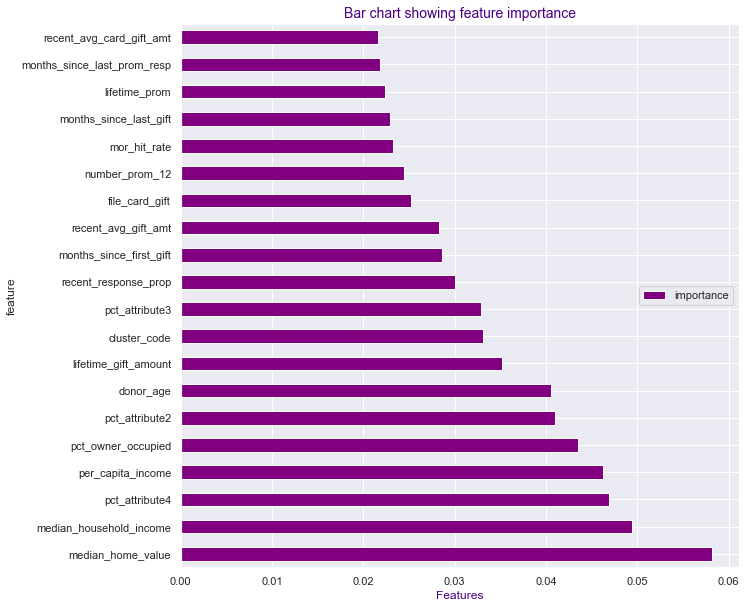

In [26]:
# Creating a bar chart of feature importance in descending order
#
dc_impo_df = dc_impo_df[:20].sort_values(by = 'importance', ascending = False)
dc_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [27]:

# define and configure the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

[19:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.7370956641431521
The accuracy score is: 0.7370956641431521 and the f1 score is 0.1776103336921421


              precision    recall  f1-score   support

           0       0.77      0.94      0.84      4398
           1       0.37      0.12      0.18      1414

    accuracy                           0.74      5812
   macro avg       0.57      0.53      0.51      5812
weighted avg       0.67      0.74      0.68      5812



array([[4119,  279],
       [1249,  165]], dtype=int64)

In [28]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
frequency_status_97nk,0.0743
recent_card_response_count,0.0340
pep_star,0.0272
card_prom_12,0.0272
urbanicity_R,0.0241
recency_status_96nk_N,0.0210
overlay_source_P,0.0210
lifetime_gift_count,0.0207
overlay_source_M,0.0195


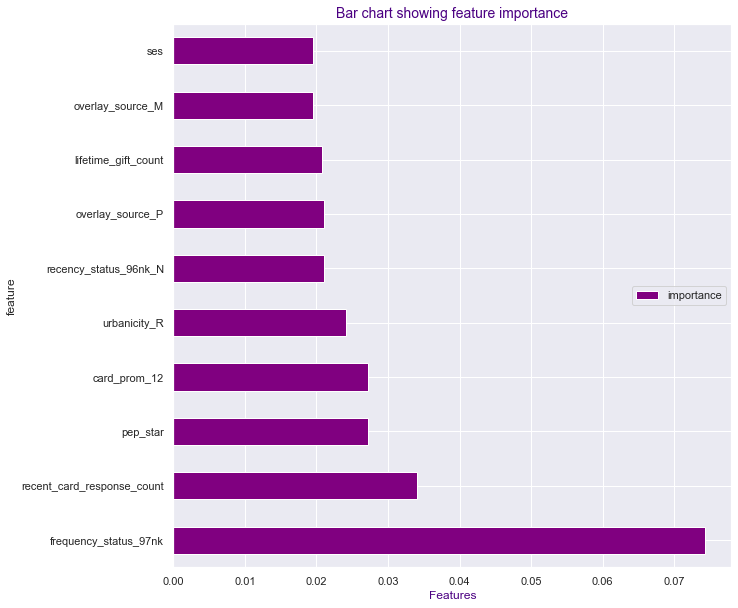

In [29]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [30]:
# define and configure the model
model = CatBoostClassifier(verbose=False)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7558499655884378
The accuracy score is: 0.7558499655884378 and the f1 score is 0.11478477854023705


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.49      0.07      0.11      1414

    accuracy                           0.76      5812
   macro avg       0.63      0.52      0.49      5812
weighted avg       0.70      0.76      0.68      5812



array([[4301,   97],
       [1322,   92]], dtype=int64)

In [31]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df



,importance
feature,
donor_age,5.1496
median_home_value,5.0365
median_household_income,4.6331
pct_owner_occupied,4.3947
per_capita_income,4.2978
pct_attribute4,4.1750
pct_attribute2,3.7774
pct_attribute3,3.4204
recent_response_prop,2.9285


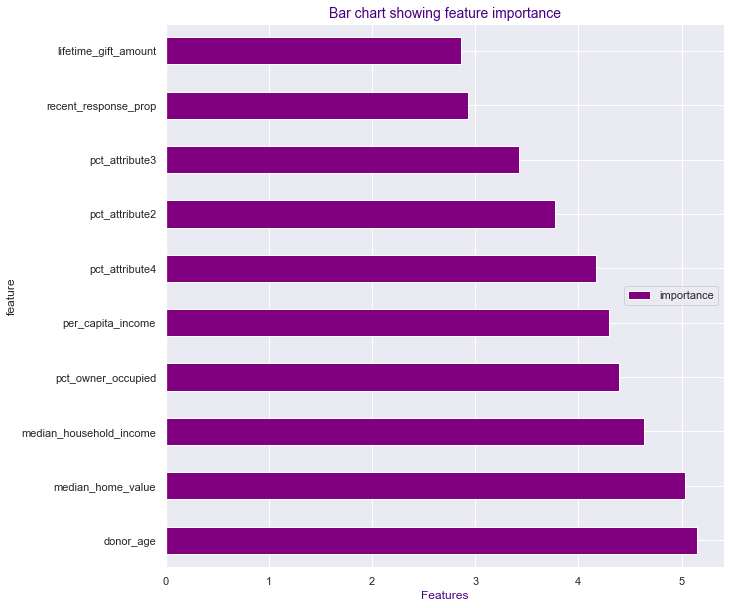

In [32]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [33]:

# define and configure the model
# l1 regularization gives better results
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.755677907777013
The accuracy score is: 0.755677907777013 and the f1 score is 0.0056022408963585435


              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4398
           1       0.29      0.00      0.01      1414

    accuracy                           0.76      5812
   macro avg       0.52      0.50      0.43      5812
weighted avg       0.64      0.76      0.65      5812



array([[4388,   10],
       [1410,    4]], dtype=int64)

In [34]:
# define and configure the model
model = AdaBoostClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7570543702684102
The accuracy score is: 0.7570543702684102 and the f1 score is 0.09718670076726343


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.51      0.05      0.10      1414

    accuracy                           0.76      5812
   macro avg       0.64      0.52      0.48      5812
weighted avg       0.70      0.76      0.67      5812



array([[4324,   74],
       [1338,   76]], dtype=int64)

In [35]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
frequency_status_97nk,0.08
months_since_first_gift,0.08
months_since_last_gift,0.06
number_prom_12,0.06
lifetime_avg_gift_amt,0.06
median_home_value,0.06
median_household_income,0.04
pct_owner_occupied,0.04
pct_attribute4,0.04


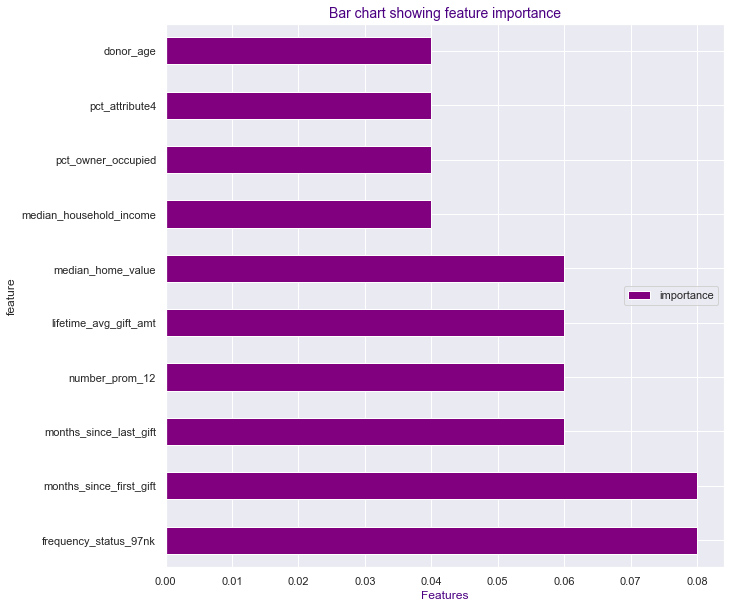

In [36]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [37]:
# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7565381968341363
The accuracy score is: 0.7565381968341363 and the f1 score is 0.08650742414460942


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.50      0.05      0.09      1414

    accuracy                           0.76      5812
   macro avg       0.63      0.52      0.47      5812
weighted avg       0.70      0.76      0.67      5812



array([[4330,   68],
       [1347,   67]], dtype=int64)

In [38]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0433
per_capita_income,0.0419
median_household_income,0.0408
pct_owner_occupied,0.0357
pct_attribute4,0.0355
pct_attribute2,0.0344
pct_attribute3,0.0338
donor_age,0.0333
lifetime_gift_amount,0.0324


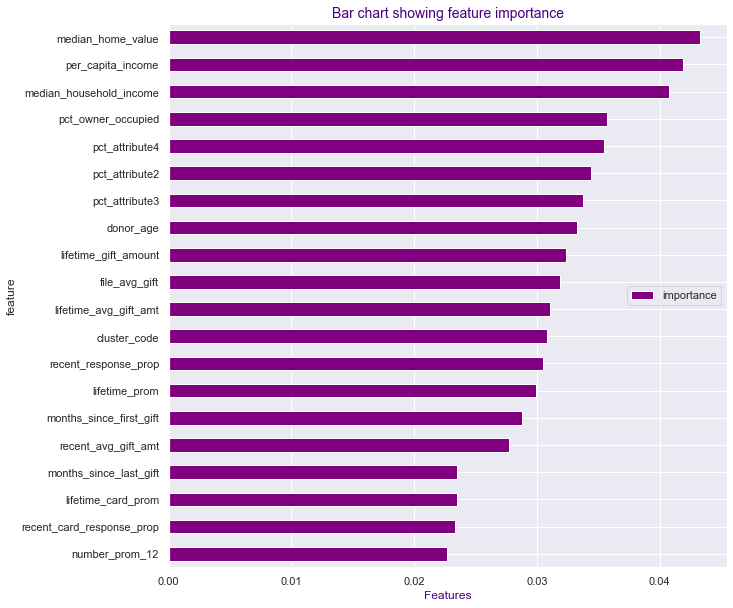

In [39]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:20].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

### Using the most important features to build a random forest model

In [40]:
rf_impo_df.index

Index(['number_prom_12', 'recent_card_response_prop', 'lifetime_card_prom',
       'months_since_last_gift', 'recent_avg_gift_amt',
       'months_since_first_gift', 'lifetime_prom', 'recent_response_prop',
       'cluster_code', 'lifetime_avg_gift_amt', 'file_avg_gift',
       'lifetime_gift_amount', 'donor_age', 'pct_attribute3', 'pct_attribute2',
       'pct_attribute4', 'pct_owner_occupied', 'median_household_income',
       'per_capita_income', 'median_home_value'],
      dtype='object', name='feature')

# Data Modelling

## Random Forest Classifier

### Remodelling with the most important features only

In [41]:
# Selecting only important features and the y variable
#
X = X[rf_impo_df.index]

y = y


In [42]:
X.shape, y.shape

((19372, 20), (19372,))

In [43]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7549896765313145
The accuracy score is: 0.7549896765313145 and the f1 score is 0.09987357774968394


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.47      0.06      0.10      1414

    accuracy                           0.75      5812
   macro avg       0.62      0.52      0.48      5812
weighted avg       0.69      0.75      0.67      5812



array([[4309,   89],
       [1335,   79]], dtype=int64)

In [44]:
# Selecting the independent variables and the target variable
#
y = train_data_under_sampled['donated']
X = train_data_under_sampled.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [45]:
total_data = pd.concat([X, test_data])

In [46]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [47]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [48]:
total_data.shape

(11834, 57)

* **Splitting the Train and Test data to after encoding the categorical columns**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(total_data)
train_d2 = pd.DataFrame(train_d1,columns=total_data.columns)
total_data = train_d2

In [49]:
X_train_cat_encoded =  total_data.iloc[:9686]
X_test_cat_encoded =  total_data.iloc[9686:]
X_train_cat_encoded.shape, X_test_cat_encoded.shape

((9686, 57), (2148, 57))

In [50]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [51]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y, test_size = 0.3, random_state = 101)

In [52]:
## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.5667584308327598
The accuracy score is: 0.5667584308327598 and the f1 score is 0.552435122644863


              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1446
           1       0.57      0.53      0.55      1460

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906



array([[870, 576],
       [683, 777]], dtype=int64)

In [53]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0450
per_capita_income,0.0415
median_household_income,0.0404
pct_owner_occupied,0.0368
donor_age,0.0352
pct_attribute4,0.0350
pct_attribute2,0.0348
pct_attribute3,0.0347
file_avg_gift,0.0316


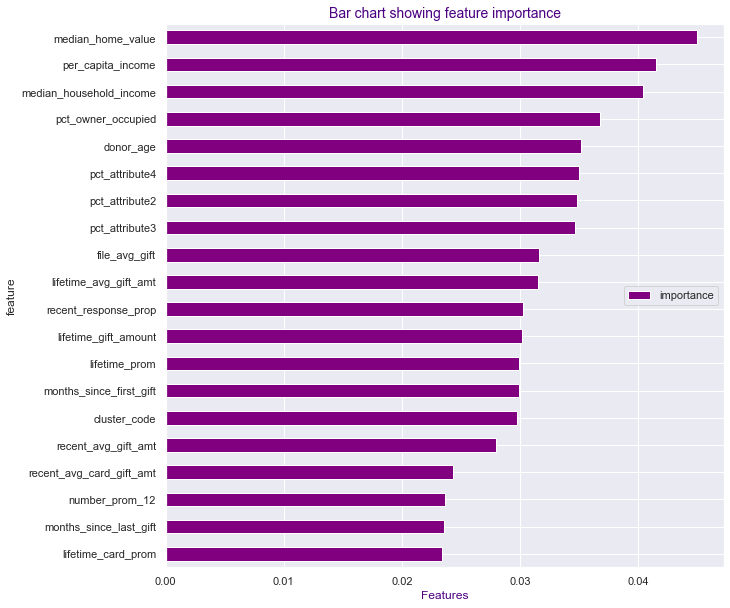

In [54]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:20].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [55]:
rf_impo_df.index

Index(['lifetime_card_prom', 'months_since_last_gift', 'number_prom_12',
       'recent_avg_card_gift_amt', 'recent_avg_gift_amt', 'cluster_code',
       'months_since_first_gift', 'lifetime_prom', 'lifetime_gift_amount',
       'recent_response_prop', 'lifetime_avg_gift_amt', 'file_avg_gift',
       'pct_attribute3', 'pct_attribute2', 'pct_attribute4', 'donor_age',
       'pct_owner_occupied', 'median_household_income', 'per_capita_income',
       'median_home_value'],
      dtype='object', name='feature')

### Modelling the undersampled data with the most important features

In [56]:
# Selecting only important features and the y variable
#
X = X[rf_impo_df.index]

y = y


In [57]:
X.shape, y.shape

((9686, 20), (9686,))

In [58]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5815554026152787
The accuracy score is: 0.5815554026152787 and the f1 score is 0.5718309859154929


              precision    recall  f1-score   support

           0       0.58      0.61      0.59      1446
           1       0.59      0.56      0.57      1460

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



array([[878, 568],
       [648, 812]], dtype=int64)

### Undersampling leads to a remarkable imporovement in the recall and f1-score

### Parameter Tuning

In [59]:
# Previewing the parameters to tune
#
RandomForestClassifier()


RandomForestClassifier()

In [60]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [61]:
X.shape

(9686, 20)

In [62]:
# Applying the best parameters to the model


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier(max_depth = 5, n_estimators = 30)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5815554026152787
The accuracy score is: 0.5815554026152787 and the f1 score is 0.5678749111584932


              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1446
           1       0.59      0.55      0.57      1460

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



array([[891, 555],
       [661, 799]], dtype=int64)

*Parameter tuning hasn't decreased or increased the f1 score*

### Cross Validation to check for the stability of the model

In [63]:
# Performing cross validation of ten folds
#
scores = cross_val_score(model, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.46284537014821875
Standard deviation of the cross validation scores is 0.08887218314932606


## Challenging the solution

*Using different models to check whether performance can be improved*

In [ ]:
X_test_cat_encoded = X_test_cat_encoded[rf_impo_df.index]

In [ ]:
X_test_cat_encoded.shape

In [ ]:
X_test_cat_encoded.head()

In [ ]:
y__ =  y.copy()
total_test_set_prediction = []
kf = KFold(n_splits=5, random_state=False, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestClassifier(n_estimators=600,random_state=101)

    # fit the model
    rf_model.fit(X_train, y_train)
    # evaluate the model
    preds = rf_model.predict(X_test)
    test_preds  = rf_model.predict(X_test_cat_encoded)
    total_test_set_prediction.append(test_preds)
    #arr = np.stack([arr,test_preds],1)
    y__.iloc[test_index] = preds
    print('k-fold Accuracy : ',accuracy_score(y_test, preds))
print('Cross_validation_Accuracy : ',accuracy_score(y__, y))
test_pred_array = np.array(total_test_set_prediction)
test_pred_array_T = test_pred_array.transpose()
final_test_pred  = mode(test_pred_array_T,1)[0]
final_test_pred = final_test_pred.reshape((-1))

In [ ]:
predicted_donors = pd.DataFrame()
predicted_donors['donated'] = final_test_pred
predicted_donors['control_no'] = test_control_no
predicted_donors.head()

In [ ]:
predicted_donors['donated'].value_counts()

## Conclusion

* *Out of all the models used to predict whether a person has donates or not, the RandomForestClassifier performs well with an accuracy score of approximately 74.6%*



